<a href="https://colab.research.google.com/github/VenjanV/Traffic-sign-detection-AI-ML/blob/main/traffic_sign_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
from zipfile import ZipFile
file_name = "/content/gdrive/MyDrive/Colab Notebooks/GTSRB_Final_Training_Images.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("done")
file_name = "/content/gdrive/MyDrive/Colab Notebooks/GTSRB_Final_Test_Images.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("done")

done
done


In [ ]:
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd
import cv2
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout,Conv2D,MaxPooling2D,GlobalMaxPooling1D
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# The German Traffic Sign Recognition Benchmark
#
# sample code for reading the traffic sign images and the
# corresponding labels
#
# example:
#            
# trainImages, trainLabels = readTrafficSigns('GTSRB/Training')
# print len(trainLabels), len(trainImages)
# plt.imshow(trainImages[42])
# plt.show()
#
# have fun, Christian


# function for reading the images
# arguments: path to the traffic sign data, for example './GTSRB/Training'
# returns: list of images, list of corresponding labels 
def readTrafficSigns(rootpath):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.

    Arguments: path to the traffic sign data, for example './GTSRB/Training'
    Returns:   list of images, list of corresponding labels'''
    images = [] # images
    labels = [] # corresponding labels
    # loop over all 42 classes
    for c in range(0,43):
        prefix = rootpath + '/' + format(c, '05d') + '/' # subdirectory for class
        gtFile = open(prefix + 'GT-'+ format(c, '05d') + '.csv') # annotations file
        gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
        next(gtReader) # skip header
        # loop over all images in current annotations file
        for row in gtReader:
            images.append(plt.imread(prefix + row[0])) # the 1th column is the filename
            labels.append(row[7]) # the 8th column is the label
        gtFile.close()
    return images, labels
def readTrafficTestSigns(rootpath):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.

    Arguments: path to the traffic sign data, for example './GTSRB/Training'
    Returns:   list of images, list of corresponding labels'''
    images = [] # images
    labels = [] # corresponding labels
    # loop over all 42 classes
    # for c in range(0,43):
    prefix = rootpath + '/' # subdirectory for class
    gtFile = open(prefix + 'GT-final_test' + '.csv') # annotations file
    gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
    next(gtReader) # skip header
    # loop over all images in current annotations file
    for row in gtReader:
        images.append(plt.imread(prefix + row[0])) # the 1th column is the filename
        labels.append(row[7]) # the 8th column is the label
    gtFile.close()
    return images, labels

In [ ]:
trainImages, trainLabels = readTrafficSigns('/content/GTSRB/Final_Training/Images')
testImages, testLabels = readTrafficTestSigns('/content/GTSRB/Final_Test/Images')
print(len(trainLabels), len(trainImages))
print(len(testLabels), len(testImages))
# plt.imshow(trainImages[42])
# plt.show()

39209 39209
12630 12630


In [ ]:
import csv
def getSignnames(path):
  file = open(path)
  csvreader = csv.reader(file)
  header = []
  header = next(csvreader)
  print(header)
  rows = []
  for row in csvreader:
    rows.append(row)
  file.close()
  return rows

In [ ]:
%cp '/content/gdrive/MyDrive/Colab Notebooks/signnames.csv' '/content/'

In [ ]:
signNames = getSignnames('/content/signnames.csv')
#print(signNames)

['ClassId', 'SignName']


In [ ]:
def showData(l,signNames,m,n):
  fig = plt.figure(figsize=(18.5, 10.5))
  # fig.set_size_inches()
  for i in range(43):
      plt.subplot(m,n,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(l[i])
      # The CIFAR labels happen to be arrays, 
      # which is why you need the extra index
      plt.xlabel(signNames[i][1])
  fig.tight_layout()
  plt.show()

In [ ]:
train_images = []
test_images = []
for i in range(len(trainImages)):
  train_images.append(np.array((cv2.resize(trainImages[i], dsize=(30, 30), interpolation=cv2.INTER_CUBIC))/255.)) 
for i in range(len(testImages)):
  test_images.append(np.array((cv2.resize(testImages[i], dsize=(30, 30), interpolation=cv2.INTER_CUBIC))/255.))
train_images = np.array(train_images)
test_images = np.array(test_images)

In [ ]:
trainImgs = []
c = 0
for i in range(len(trainLabels)):
  if int(trainLabels[i])==c:
    trainImgs.append(train_images[i])
    c += 1

#test images of each class
testDict = {}
c = 0
for i in range(len(testLabels)):
  if int(testLabels[i]) not in testDict:
    testDict[int(testLabels[i])] = test_images[i]
testImgs = [0]*43
for key,val in testDict.items():
  testImgs[key] = val

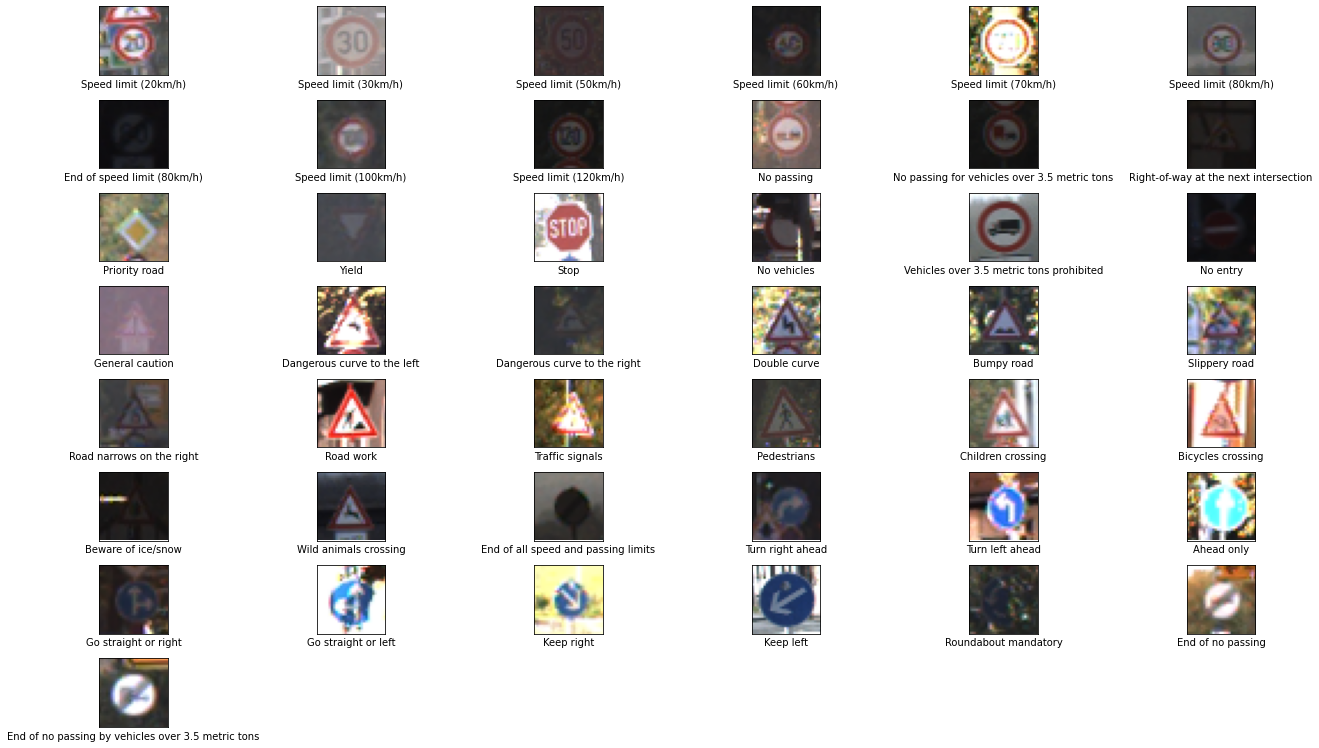

In [ ]:
# print(len(l),len(signNames),l[0].shape,l[20].shape)
showData(trainImgs,signNames,8,6)

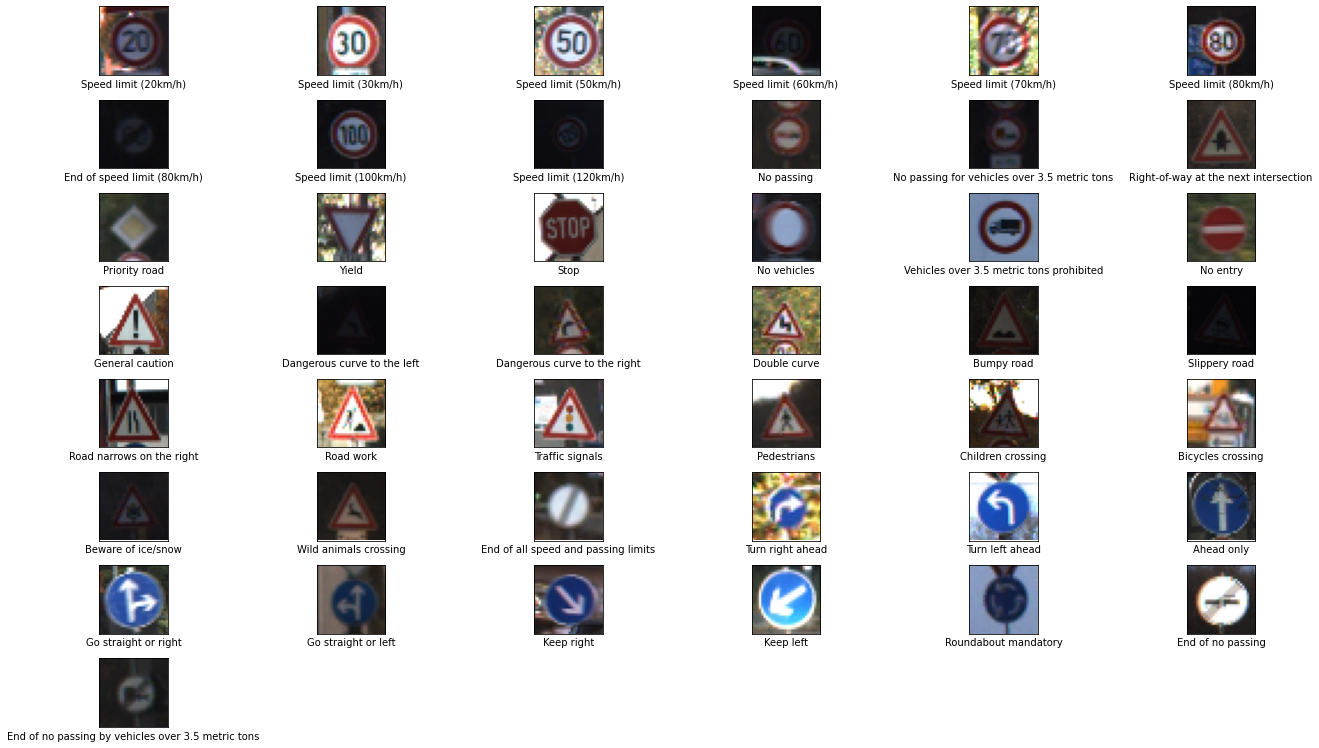

In [ ]:
showData(testImgs,signNames,8,6)

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(30,30,3)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation='softmax'))
# model.add(Dropout(0.5))
# model.add(Dense(1, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 28, 28, 32)        896       
                                                                 
 conv2d_21 (Conv2D)          (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 13, 13, 64)        0         
                                                                 
 dropout_21 (Dropout)        (None, 13, 13, 64)        0         
                                                                 
 conv2d_22 (Conv2D)          (None, 11, 11, 128)       73856     
                                                      

In [ ]:
for i in range(len(trainLabels)):
  trainLabels[i] = int(trainLabels[i])
for i in range(len(testLabels)):
  testLabels[i] = int(testLabels[i])
train_labels = np.array(trainLabels)
test_labels = np.array(testLabels)
model.compile(optimizer='adam',loss = tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
# model.compile(loss='categorical_crossentropy',optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.0001, decay=1e-6),metrics=['accuracy'])
model_info = model.fit(
        train_images, train_labels,
        batch_size = 64,
        steps_per_epoch= 1+len(train_images) //64,
        epochs=10,
        validation_data=(test_images,test_labels),
        validation_steps= 1+len(test_images)//64)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


613/613 [==============================] - 6s 9ms/step - loss: 1.3287 - accuracy: 0.6095 - val_loss: 0.2782 - val_accuracy: 0.9167
Epoch 2/10
613/613 [==============================] - 6s 10ms/step - loss: 0.2154 - accuracy: 0.9343 - val_loss: 0.1341 - val_accuracy: 0.9633
Epoch 3/10
613/613 [==============================] - 5s 9ms/step - loss: 0.1214 - accuracy: 0.9626 - val_loss: 0.1461 - val_accuracy: 0.9644
Epoch 4/10
613/613 [==============================] - 6s 10ms/step - loss: 0.0907 - accuracy: 0.9725 - val_loss: 0.1565 - val_accuracy: 0.9629
Epoch 5/10
613/613 [==============================] - 5s 9ms/step - loss: 0.0728 - accuracy: 0.9776 - val_loss: 0.1170 - val_accuracy: 0.9690
Epoch 6/10
613/613 [==============================] - 6s 10ms/step - loss: 0.0682 - accuracy: 0.9792 - val_loss: 0.1051 - val_accuracy: 0.9741
Epoch 7/10
613/613 [==============================] - 6s 10ms/step - loss: 0.0537 - accuracy: 0.9828 - val_loss: 0.1055 - val_accuracy: 0.9752
Epoch 8/10
61

In [ ]:
# print(max(test_labels),test_labels[0])
# print(len(train_images),test_images[0].shape)

# Batch Gradient Descent. Batch Size = Size of Training Set
# Stochastic Gradient Descent. Batch Size = 1
# Mini-Batch Gradient Descent. 1 < Batch Size < Size of Training Set


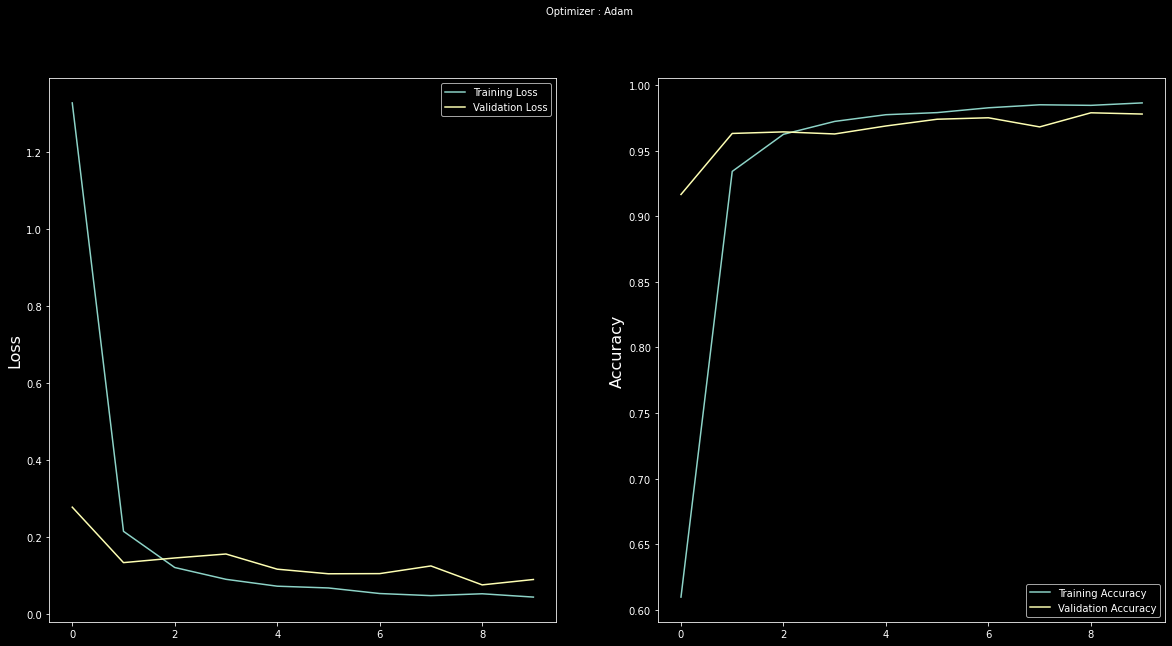

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(model_info.history['loss'], label='Training Loss')
plt.plot(model_info.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(model_info.history['accuracy'], label='Training Accuracy')
plt.plot(model_info.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
model.save('temp_model.h5')